In [98]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [99]:
# Reading the csv file
newapp = pd.read_csv("application_data.csv")
prev_app = pd.read_csv("previous_application.csv")

In [100]:
# Checking app data set
newapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# Checking the shape
newapp.shape

(307511, 122)

In [102]:
newapp.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [103]:
newapp.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [104]:
# Checking Prev Data set
prev_app.shape

(1670214, 37)

In [105]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [107]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Data Analysis for newapp Data

In [108]:
#Checking the % of null values in the newapp Data

round(newapp.isnull().mean()*100,2).sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [109]:
#removing the columns with more than 50% null values

newapp = newapp.loc[:,newapp.isnull().mean()<= 0.5]
newapp.shape

(307511, 81)

In [110]:
# checking columns with less than or equal to 13% null values for possible imputation

list(newapp.columns[(newapp.isnull().mean()<= 0.13) & (newapp.isnull().mean()> 0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

## Checking the columns for imputations of values

### 1. AMT_GOODS_PRICE imputations

In [111]:
newapp['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
             ...  
694152.0         1
250398.0         1
692914.5         1
346099.5         1
887949.0         1
1415259.0        1
444010.5         1
343840.5         1
686763.0         1
888061.5         1
171468.0         1
342823.5         1
443421.0         1
886770.0         1
349834.5         1
2142000.0        1
350068.5         1
350500.5         1
443182.5         1
702301.5         1
1971000.0        1
885523.5    

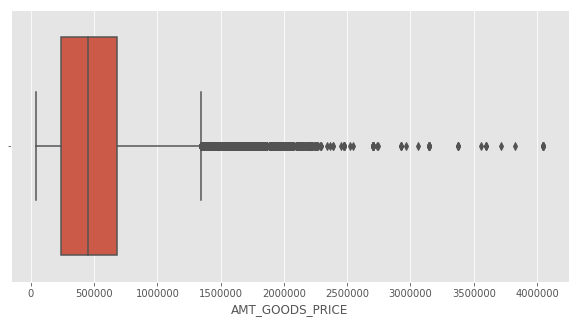

In [112]:
# Checking for Outliers as "AMT_GOODS_PRICE" is a continous variable

plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(newapp['AMT_GOODS_PRICE'])
plt.show()

Since this is a continuous variable with outliers we can impute column using median value

In [113]:
imp_VAL = round(newapp['AMT_GOODS_PRICE'].median(),2)
imp_VAL

450000.0

450000.0 is the median for the column we can impute with that

### 2. CNT_FAM_MEMBERS imputation

In [114]:
newapp['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

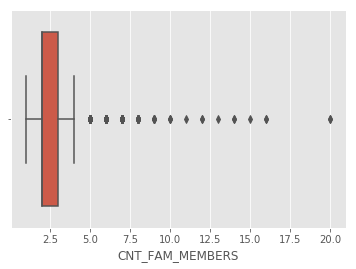

In [115]:
sns.boxplot(newapp['CNT_FAM_MEMBERS'])
plt.show()

this is a continuous variable and we can impute the mean/median. This is count of family members so lets use median of the column

In [116]:
imp_VAL = round(newapp['CNT_FAM_MEMBERS'].median(),2)
imp_VAL

2.0

the column can be imputed using the median of the column which is 2.0

### 3. EXT_SOURCE_2 imputation

In [117]:
newapp['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
0.266520    244
0.263144    243
0.162145    238
0.162192    234
0.163187    184
0.160405    173
0.191526    169
0.245350    167
0.354225    149
0.194266    140
0.192316    131
0.357282    129
0.194215    127
0.195354    123
0.355126    113
0.341123    110
0.255616     92
0.358568     90
0.293090     85
0.344191     84
0.262055     84
0.357342     81
0.254760     80
0.342028     73
0.296144     72
           ... 
0.621294      1
0.048183      1
0.431337      1
0.774998      1
0.795069      1
0.433903      1
0.067371      1
0.742777      1
0.442527      1
0.360623      1
0.457018      1
0.519864      1
0.205765      1
0.806617      1
0.275929      1
0.395266      1
0.289537      1
0.791248      1
0.116772      1
0.017752      1
0.162850      1
0.762807      1
0.278040      1
0.108404      1
0.047854      1
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Leng

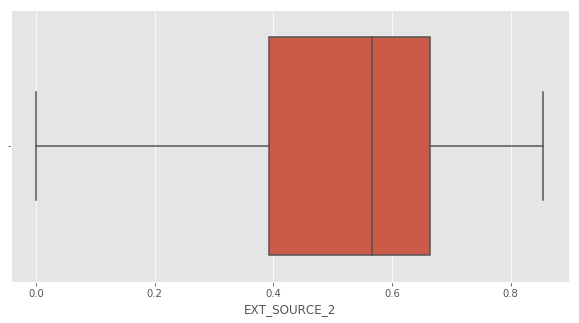

In [118]:
# EXT_SOURCE_2 is a continuous variable. So checking for outliers
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(newapp['EXT_SOURCE_2'])
plt.show()

Here we can see there is no outliers present ,so we can choose mean to impute the column

In [119]:

imp_VAL = round(newapp['EXT_SOURCE_2'].mean(),2)
imp_VAL

0.51

the mean of the column is 0.51

### 4.  AMT_Annuity Imputation

In [120]:
newapp['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
11250.0    1459
26217.0    1453
20250.0    1345
12375.0    1339
31653.0    1269
26640.0    1236
22500.0    1234
16875.0    1213
36459.0    1191
33025.5     938
26446.5     916
22018.5     904
23773.5     875
25537.5     836
26316.0     829
31261.5     822
21906.0     800
7875.0      741
40320.0     703
21888.0     688
32602.5     687
15750.0     684
27000.0     681
19867.5     653
33750.0     652
           ... 
71910.0       1
72949.5       1
36472.5       1
81202.5       1
40603.5       1
47205.0       1
39087.0       1
81225.0       1
49932.0       1
73003.5       1
53505.0       1
58243.5       1
73053.0       1
81049.5       1
62703.0       1
45877.5       1
56470.5       1
62383.5       1
63499.5       1
81094.5       1
73048.5       1
91732.5       1
56538.0       1
54297.0       1
81108.0       1
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Lengt

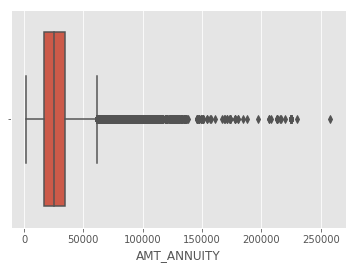

In [121]:
sns.boxplot(newapp['AMT_ANNUITY'])
plt.show()

Since AMT_ANNUITY has outliers, the column can be imputed using the median

In [122]:
imp_VAL = round(newapp['AMT_ANNUITY'].median(),2)
imp_VAL

24903.0

median of the column is 24903.0

### Approch to the Null Values of Categorial Columns: "NAME_TYPE_SUITE" and "OCCUPATION_TYPE"

In [123]:
newapp.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

NAME_TYPE_SUITE is a categorial Column, so can be imputed using the mode 

In [124]:
imp_VAL = newapp['NAME_TYPE_SUITE'].mode()
imp_VAL

0    Unaccompanied
dtype: object

Mode of the column is Unaccompanied

From the above we can impute the MODE Operation for NAME_TYPE_SUITE as this is a categorial column.
OR
This column having a very less percentage of Null values, so we can remove those rows which doesn't have much impact on analysis.

In [125]:
newapp.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

OCCUPATION_TYPE is a categorial Column, so can be imputed using the mode

In [126]:
imp_VAL = newapp['OCCUPATION_TYPE'].mode()
imp_VAL

0    Laborers
dtype: object

Mode of the column is Laborers

## Checking Datatypes of Columns

In [127]:
newapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [128]:
newapp.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Imputing absolute values in columns which contains days in negative numbers

In [129]:
# The columns starting with 'DAYS'
filter_col = [col for col in newapp if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [130]:
print(newapp['DAYS_BIRTH'].unique())
print(newapp['DAYS_EMPLOYED'].unique())
print(newapp['DAYS_REGISTRATION'].unique())
print(newapp['DAYS_ID_PUBLISH'].unique())
print(newapp['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [131]:
## Converting negative values to Positive value in the columns which consist of negative days
newapp[filter_col]= abs(newapp[filter_col])

In [132]:
print(newapp['DAYS_BIRTH'].unique())
print(newapp['DAYS_EMPLOYED'].unique())
print(newapp['DAYS_REGISTRATION'].unique())
print(newapp['DAYS_ID_PUBLISH'].unique())
print(newapp['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461. 16765. 19046. ...  7951.  7857. 25061.]
[  637.  1188.   225. ... 12971. 11084.  8694.]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120.  291. 2531. ... 6194. 5854. 6211.]
[1134.  828.  815. ... 3988. 3899. 3538.]


### Approaching to Gender Column

In [133]:
newapp['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

As there is only 4 counts in XNA category so we can drop the values from the dataset. that wont impact our analysis

In [134]:
newapp = newapp[newapp['CODE_GENDER']!='XNA']
newapp['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

In [135]:
newapp['CODE_GENDER'].value_counts()

Female    202448
Male      105059
Name: CODE_GENDER, dtype: int64

### Approaching to Organization_Type Column 

In [136]:
newapp.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

### Imputing the value'XNA' which means not available for the column 'ORGANIZATION_TYPE

In [137]:
newapp = newapp.replace('XNA',np.NaN)

In [138]:
newapp.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### Identifying Outliers for some numeric columns

#### AMT_CREDIT

In [139]:
newapp.AMT_CREDIT.value_counts()

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7240
900000.0     6246
254700.0     4500
545040.0     4437
808650.0     4152
135000.0     3660
755190.0     3524
1125000.0    3493
521280.0     3175
284400.0     3096
1078200.0    2856
454500.0     2649
1288350.0    2613
269550.0     2463
202500.0     2339
781920.0     2328
1350000.0    2321
239850.0     2084
315000.0     2072
247500.0     2057
640080.0     2041
1006920.0    1883
540000.0     1820
360000.0     1743
508495.5     1717
592560.0     1688
             ... 
1639431.0       1
1242531.0       1
1649853.0       1
618903.0        1
1114011.0       1
1650771.0       1
207504.0        1
414981.0        1
829512.0        1
829440.0        1
2116395.0       1
308475.0        1
1234741.5       1
1234863.0       1
192024.0        1
1235344.5       1
828895.5        1
1657669.5       1
1407456.0       1
828346.5        1
828216.0        1
828081.0        1
3312162.0       1
1236393.0       1
1654560.0 

In [191]:
newapp.AMT_CREDIT.describe()

count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

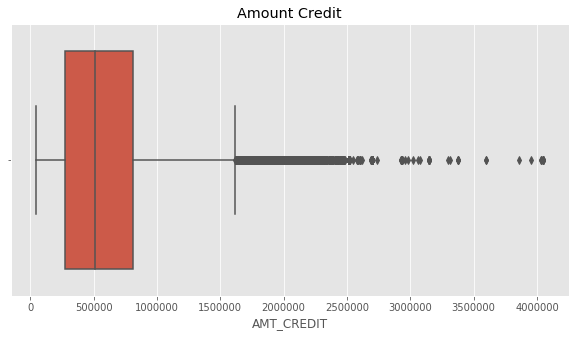

In [192]:
plt.figure(figsize=(10,5))
plt.title("Amount Credit")
sns.boxplot(newapp.AMT_CREDIT)
plt.show()

For AMT_CREDIT column there are outliers above max range which is above 1500000 in box plot and it is recommeded to binning these into categorical

#### CNT_CHILDREN

In [142]:
newapp.CNT_CHILDREN.value_counts()

0     215369
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [193]:
newapp.CNT_CHILDREN.describe()

count    307507.000000
mean          0.417047
std           0.722119
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

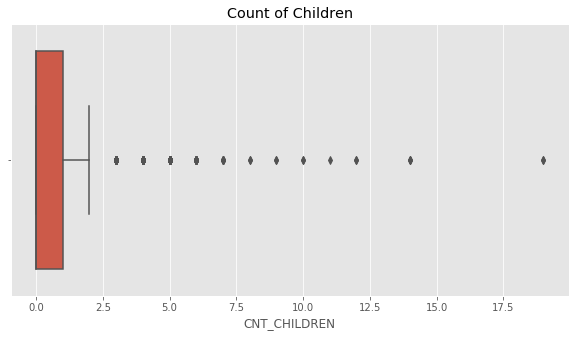

In [196]:
plt.figure(figsize=(10,5))
plt.title("Count of Children")
sns.boxplot(newapp.CNT_CHILDREN)
plt.show()

For CNT_CHILDREN column there are outliers which are 19 maximum, to handle these outliers, median is best imputation or could be removed these entries as they won't effect EDA analysis

#### AMT_INCOME_TOTAL

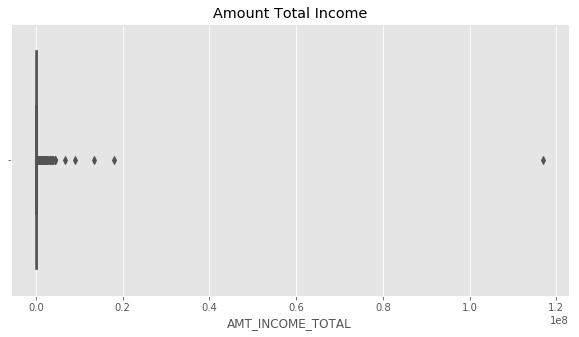

In [197]:
plt.figure(figsize=(10,5))
plt.title("Amount Total Income")
sns.boxplot(newapp.AMT_INCOME_TOTAL)
plt.show()

Here, in the coloumn 'AMT_INCOME_TOTAL' which tells us the income of the client. We observe a value of 1.2 which is surely an outlier. so we can drop this row

#### AMT_ANNUITY

In [199]:
newapp.AMT_ANNUITY.describe()

count    307495.000000
mean      27108.666786
std       14493.798379
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

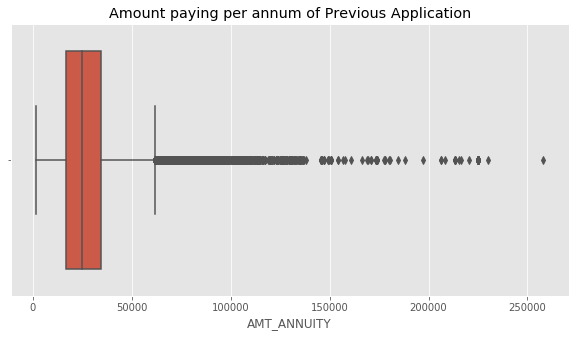

In [200]:
plt.figure(figsize=(10,5))
plt.title("Amount paying per annum of Previous Application")
sns.boxplot(newapp.AMT_ANNUITY)
plt.show()

Here, in the coloumn 'AMT_AANNUITY' which tells the loan annuity. We observe a value which is greater that 258000 which is surely an outlier.

### Binning

In [203]:
newapp['Client_Age'] = newapp.DAYS_BIRTH / 365
newapp['Client_Age'] = newapp.Client_Age.astype(int)
newapp.Client_Age.describe()

count    307507.000000
mean         43.436055
std          11.954577
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: Client_Age, dtype: float64

Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70


In [205]:
newapp['Age_Grp'] = pd.cut(newapp['Client_Age'], bins =[0,30,40,50,60,70] , labels = ['<30 years',  '30-40 years', '40-50 years', '50-60 years', '60+ years'])
newapp[['Client_Age','Age_Grp']].head()

,Client_Age,Age_Grp
0,25,<30 years
1,45,40-50 years
2,52,50-60 years
3,52,50-60 years
4,54,50-60 years


In [150]:
## Adding one more column that will be used for analysis later
newapp['CREDIT_INCOME_RATIO']=round((newapp['AMT_CREDIT']/newapp['AMT_INCOME_TOTAL']))

### Analysis

In [206]:
newapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Client_Age,Age_Grp,CREDIT_INCOME_RATIO
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,25,<30 years,2.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50 years,5.0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60 years,2.0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,52,50-60 years,2.0
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,54,50-60 years,4.0


In [207]:
newapp.TARGET.value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

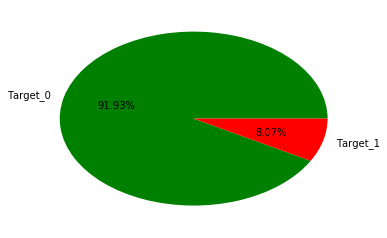

In [208]:
target_balance = newapp.TARGET.value_counts(normalize=True)*100
sizes = [target_balance[0],target_balance[1]]
labels = ['Target_0','Target_1']
colors = ['Green', 'Red']
plt.pie(sizes, labels=labels,autopct='%1.2f%%',colors=colors)
plt.show()

Its clear that there is an imbalance between people who defaulted and who didn't default. More than 92% of people didn't default as opposed to 8% who defaulted.

In [154]:
# From the remaining columns about 27 are selected based on their description and relevance with problem statement for further analysis
FinalColumns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE','Age_Grp',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [155]:
newapp_Final=newapp[FinalColumns]

In [156]:
newapp_Final.shape

(307507, 27)

### Dividing DataSet into two sets based on Target Variable. due to analysis of Univariate & Bi variate analysis

In [209]:
target_0=newapp_Final[newapp_Final['TARGET']==0]
target_1=newapp_Final[newapp_Final['TARGET']==1]

target_0.select_dtypes(include=object).columns.tolist()

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE']

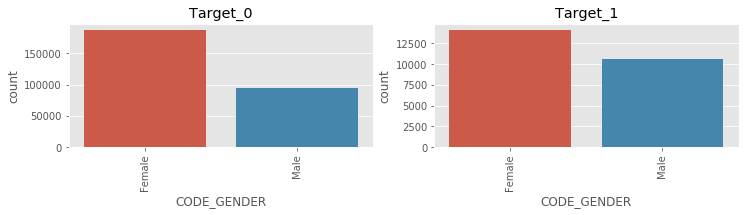

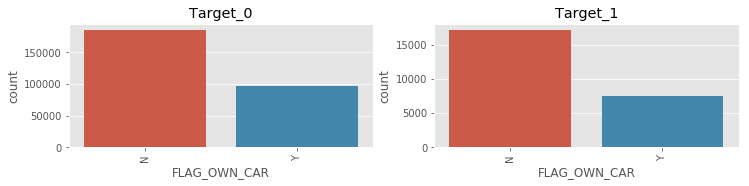

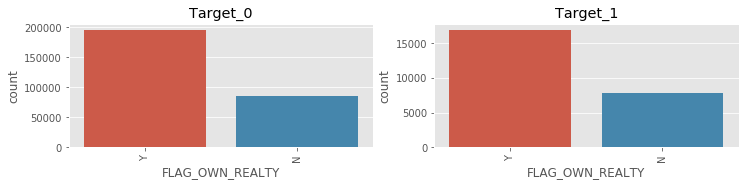

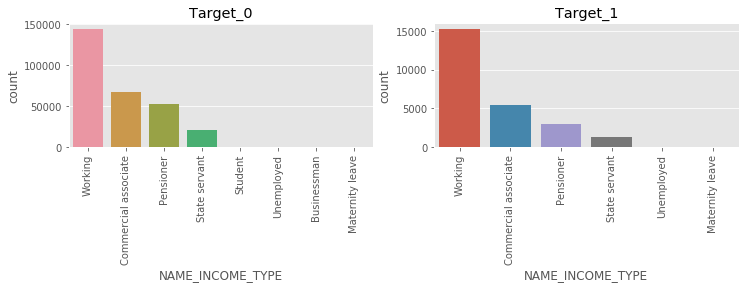

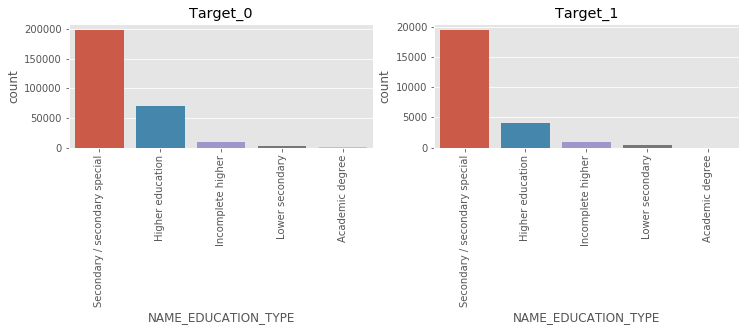

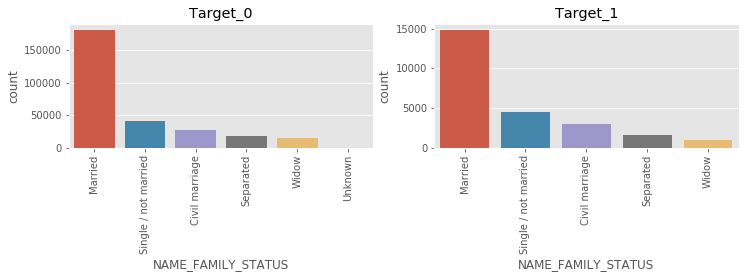

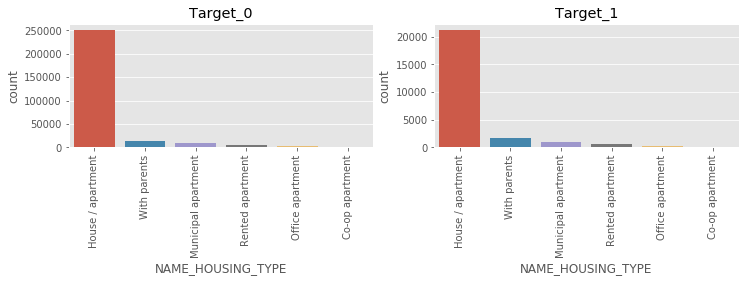

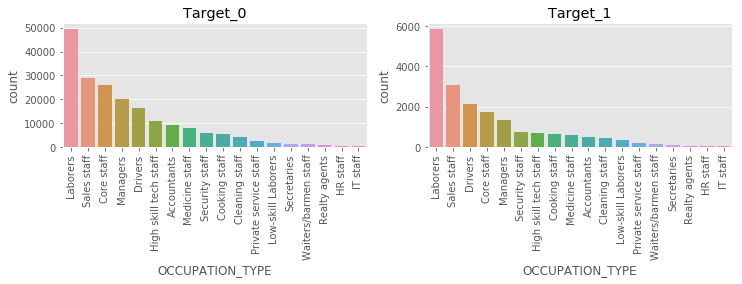

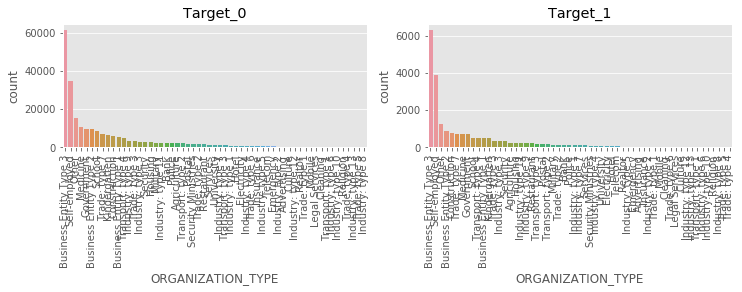

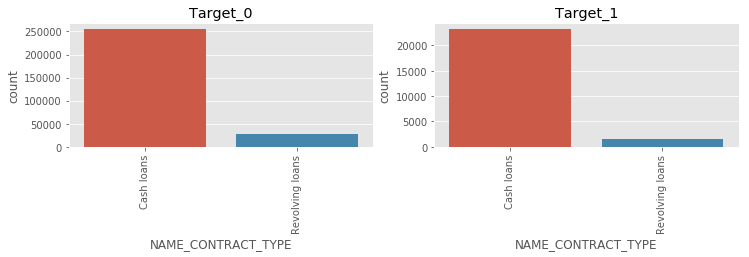

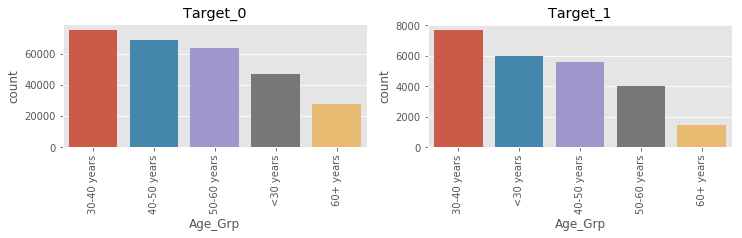

In [158]:
# function to count plot for categorical variables
def uni_cat_graph(target0,target1):
    plt.figure(figsize=(12,5))
    plt.subplot(2,2,1)
    sns.countplot(target0,order=target0.value_counts(normalize=True).index)
    plt.xticks(rotation=90)
    plt.title("Target_0")
    plt.subplot(2,2,2)
    sns.countplot(target1,order=target1.value_counts(normalize=True).index)
    plt.xticks(rotation=90)
    plt.title("Target_1")
    plt.show()
    
## Considering below Category columns for conducting Univariate Analysis    
cat_cols = ['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE','Age_Grp']

for i in cat_cols:
    uni_cat_graph(target_0[i],target_1[i])

### Getting the top 10 correlation of the selected columns

In [159]:
corr=target_0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
242,AMT_GOODS_PRICE,AMT_CREDIT,0.987253,0.987253
233,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950148,0.950148
253,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
210,AMT_ANNUITY,AMT_CREDIT,0.771308,0.771308
66,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648589,0.648589
244,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.628749,0.628749
211,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418954,0.418954
212,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.391499,0.391499
243,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349461,0.349461
50,AMT_INCOME_TOTAL,AMT_CREDIT,0.342801,0.342801


In [160]:
#Getting the top 10 correlation target_1
corr=target_1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
242,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
233,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637,0.956637
253,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
210,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
66,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744,0.639744
244,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.623163,0.623163
212,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.381298,0.381298
101,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455
133,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.186515,0.186515
134,CNT_FAM_MEMBERS,DAYS_REGISTRATION,-0.145828,0.145828


Highest correlation exist between AMT_CREDIT and AMT_GOODS_PRICE there is something related to this column
There is negative correlation existing between CNT_CHILDREN and DAYS_BIRTH
Least correlation exist between the DAYS_EMPLOYED and DAYS_ID_PUBLISH

In [161]:
target_0.describe()

,SK_ID_CURR,TARGET,AMT_CREDIT,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_ANNUITY,REGION_RATING_CLIENT,AMT_GOODS_PRICE
count,282682.000000,282682.0,2.826820e+05,2.826820e+05,282682.000000,282682.000000,282682.000000,282682.000000,282680.000000,282682.000000,245455.000000,245455.000000,245455.000000,282670.000000,282682.000000,2.824250e+05
mean,278245.842707,0.0,6.026512e+05,1.690775e+05,3.963917,69669.740199,5029.953704,0.056841,2.150145,2.022446,0.006914,0.270689,0.265939,27163.725162,2.043575,5.427385e+05
std,102825.730701,0.0,4.068479e+05,1.104769e+05,2.711188,140984.138033,3538.460981,0.231539,0.906982,0.501971,0.111092,0.928789,0.805360,14658.374793,0.508423,3.737864e+05
min,100003.000000,0.0,4.500000e+04,2.565000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1615.500000,1.000000,4.050000e+04
25%,189104.250000,0.0,2.700000e+05,1.125000e+05,2.000000,966.250000,2045.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,16456.500000,2.000000,2.385000e+05
50%,278363.500000,0.0,5.177880e+05,1.485000e+05,3.000000,2304.000000,4544.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,24876.000000,2.000000,4.500000e+05
75%,367242.750000,0.0,8.100000e+05,2.025000e+05,5.000000,6074.000000,7550.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,34749.000000,2.000000,6.885000e+05
max,456255.000000,0.0,4.050000e+06,1.800009e+07,49.000000,365243.000000,24672.000000,1.000000,20.000000,3.000000,9.000000,27.000000,261.000000,258025.500000,3.000000,4.050000e+06


## Bivariate Analysis:

In [162]:
target_0.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'CREDIT_INCOME_RATIO', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'Age_Grp',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'REGION_RATING_CLIENT', 'AMT_GOODS_PRICE'],
      dtype='object')

In [163]:
target_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282682 entries, 1 to 307510
Data columns (total 27 columns):
SK_ID_CURR                     282682 non-null int64
TARGET                         282682 non-null int64
CODE_GENDER                    282682 non-null object
FLAG_OWN_CAR                   282682 non-null object
FLAG_OWN_REALTY                282682 non-null object
AMT_CREDIT                     282682 non-null float64
AMT_INCOME_TOTAL               282682 non-null float64
CREDIT_INCOME_RATIO            282682 non-null float64
NAME_INCOME_TYPE               282682 non-null object
NAME_EDUCATION_TYPE            282682 non-null object
NAME_FAMILY_STATUS             282682 non-null object
NAME_HOUSING_TYPE              282682 non-null object
DAYS_EMPLOYED                  282682 non-null float64
DAYS_REGISTRATION              282682 non-null float64
FLAG_EMAIL                     282682 non-null int64
OCCUPATION_TYPE                192571 non-null object
Age_Grp                

In [164]:
cat_cols_set = target_0.select_dtypes(include=['object','category']).columns.tolist()
con_cols_set = target_0.select_dtypes(include=numerical_dtypes).columns.tolist()
cat_cols_set,con_cols_set

(['CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'OCCUPATION_TYPE',
  'Age_Grp',
  'ORGANIZATION_TYPE',
  'NAME_CONTRACT_TYPE'],
 ['SK_ID_CURR',
  'TARGET',
  'AMT_CREDIT',
  'AMT_INCOME_TOTAL',
  'CREDIT_INCOME_RATIO',
  'DAYS_EMPLOYED',
  'DAYS_REGISTRATION',
  'FLAG_EMAIL',
  'CNT_FAM_MEMBERS',
  'REGION_RATING_CLIENT_W_CITY',
  'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_MON',
  'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_ANNUITY',
  'REGION_RATING_CLIENT',
  'AMT_GOODS_PRICE'])

In [165]:
numerical_dtypes

['int64', 'float32', 'float64']

In [166]:
bi_cat_cols = ['FLAG_OWN_CAR','CODE_GENDER','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
bi_con_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
bi_cat_con_cols = ['FLAG_OWN_CAR','CNT_CHILDREN','CODE_GENDER','AMT_INCOME_TOTAL']
from itertools import combinations
def com_funct(cols_list):
    com_list = []
    for i in range(0,len(cols_list)):
        com_list.extend(combinations(cols_list, i + 1))
    com_list_1=[]
    for i in com_list:
        if(len(i) == 2):
            com_list_1.append(i)
    return com_list_1

temp1 = com_funct(bi_cat_cols)
temp2 = com_funct(bi_con_cols)
temp3 = com_funct(bi_cat_con_cols)

In [167]:
com_list = [] 
for i in range(0,len(bi_cat_cols)): 
    com_list.extend(combinations(bi_cat_cols, i + 1)) 
com_list_1=[]
for i in com_list:
    if(len(i) == 2):
        com_list_1.append(i)
com_list_1

[('FLAG_OWN_CAR', 'CODE_GENDER'),
 ('FLAG_OWN_CAR', 'NAME_HOUSING_TYPE'),
 ('FLAG_OWN_CAR', 'OCCUPATION_TYPE'),
 ('CODE_GENDER', 'NAME_HOUSING_TYPE'),
 ('CODE_GENDER', 'OCCUPATION_TYPE'),
 ('NAME_HOUSING_TYPE', 'OCCUPATION_TYPE')]

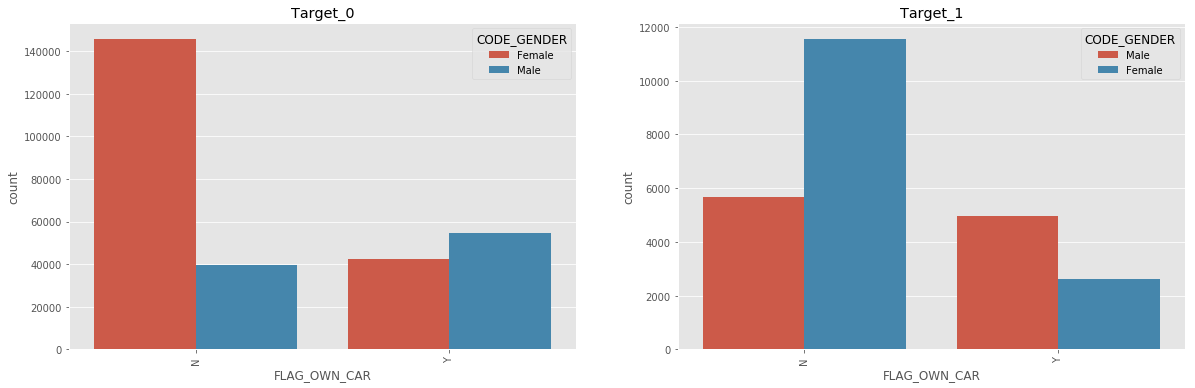

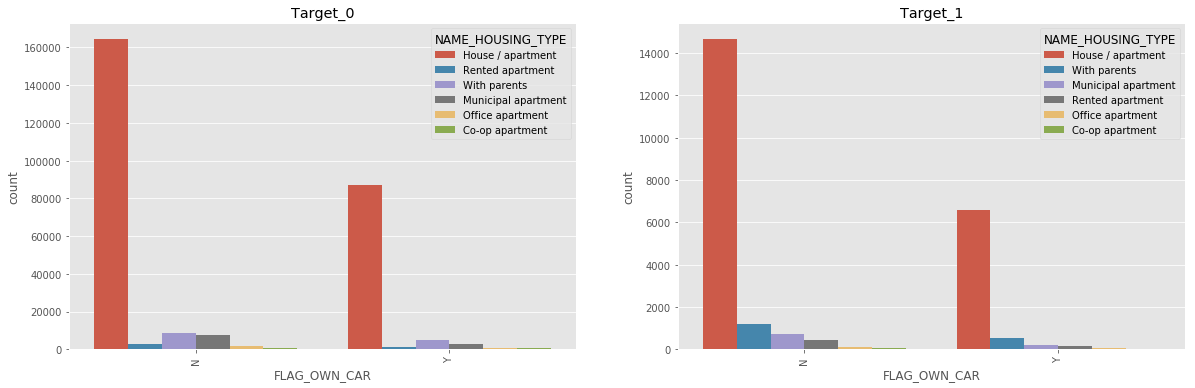

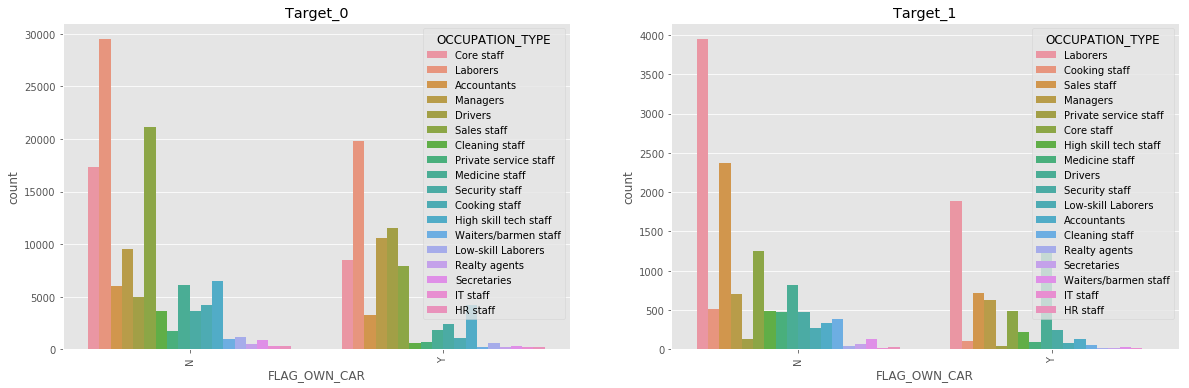

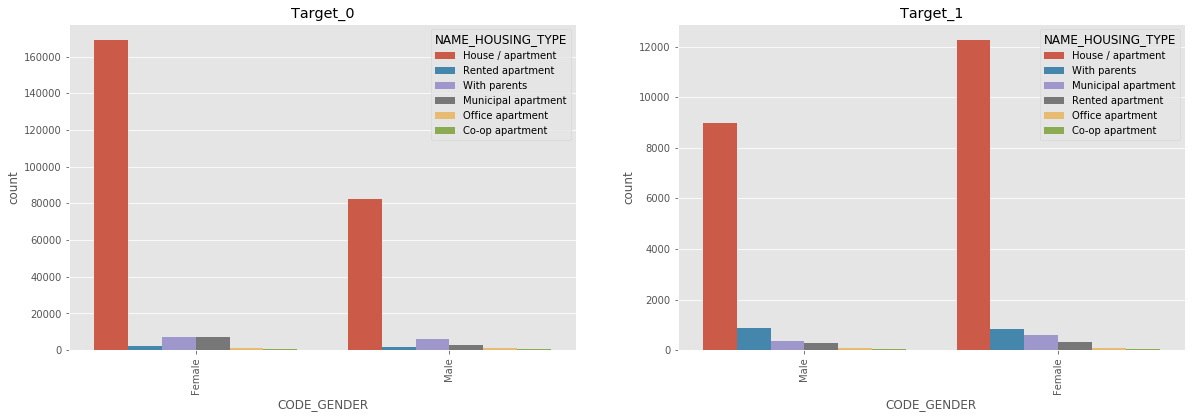

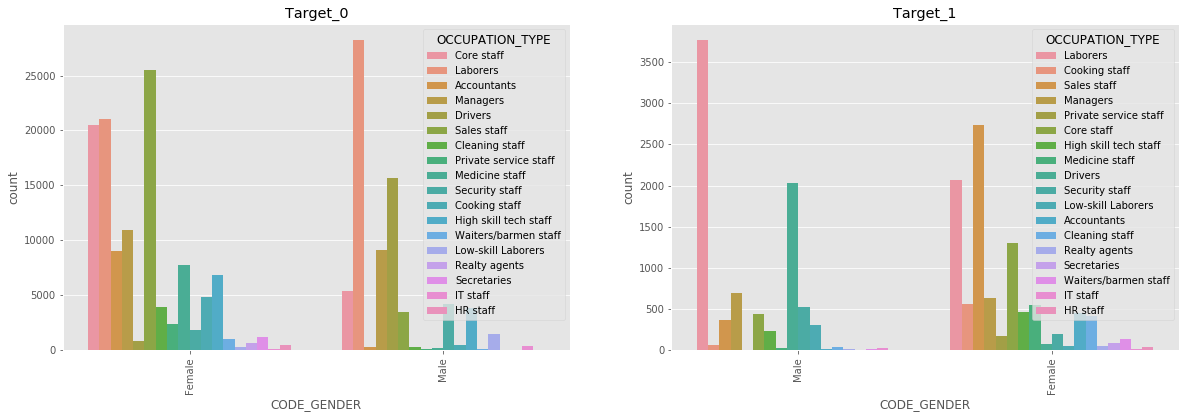

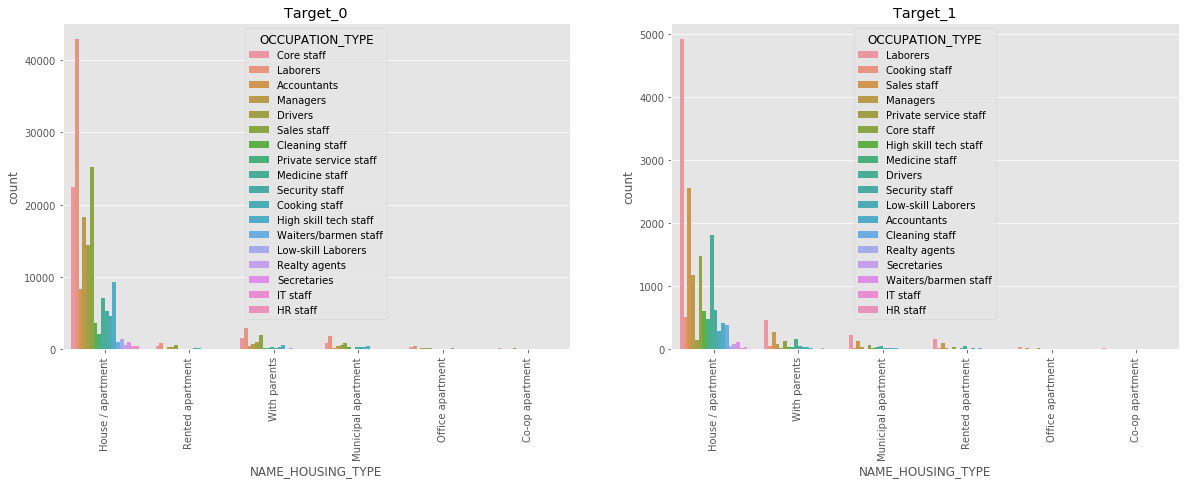

In [168]:
for i in temp1:
    plt.figure(figsize = (20,6))
    plt.subplot(1,2,1)
    plt.title("Target_0")
    plt.xticks(rotation=90)
    
    sns.countplot(x = i[0] , hue = i[1] , data = target_0)
    plt.subplot(1,2,2)
    plt.title("Target_1")
    plt.xticks(rotation=90)
    
    sns.countplot(x = i[0], hue = i[1], data = target_1)
    plt.show()

#1. The female gender who does't own a car are more non-defaulters and its the same the same for likelt to default.
#2. The male gender who owns a House / apartment are more likely to default than non-defaulters
#3. The occupation type core staff who owns of House/apartment are more in number of non-Defaulters whereas the occupation type Laborers who owns of House/apartment are high in number to likely to default
#4. The Male Gender laborers doesn't have significant difference between Non-Defaluting and likely to default and the female sales staff members are more in number of Non-Defaulters than likely to default.

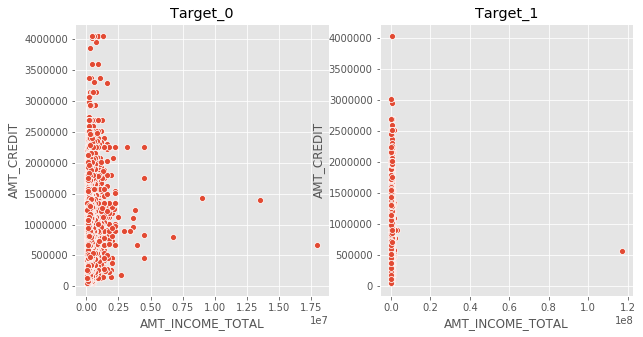

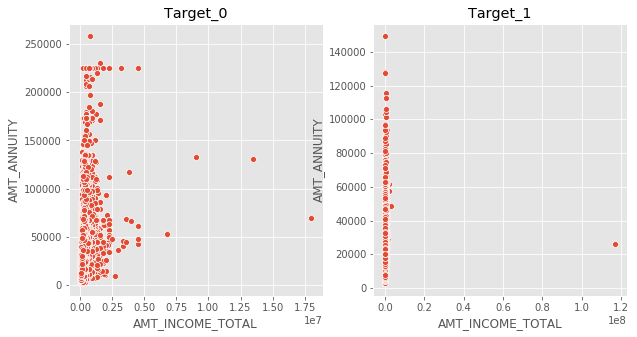

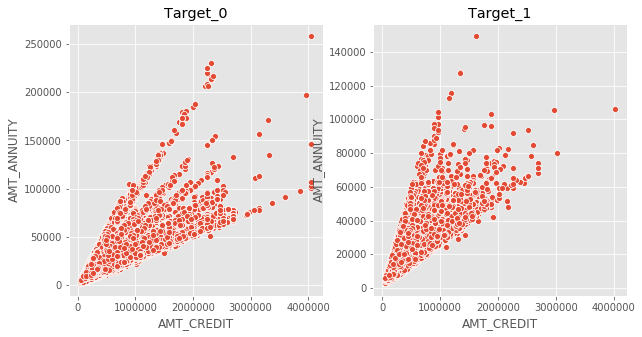

In [169]:
for i in temp2:
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.title("Target_0")
    sns.scatterplot(i[0],i[1],data=target_0)
    plt.subplot(1,2,2)
    plt.title("Target_1")
    sns.scatterplot(i[0],i[1],data=target_1)
    
    plt.show()

#1. Applicants who have high income and with no childeren are more likely to default
#2. Providing a loan amount of Range 500000-2500000 to the total income of Less 500000 are more likely to default than non-default
#3. There are more people who haven't paid back their loans on time with a total income of less than 500000 and are more likely ot default.
#4. The variables AMT_ANNUITY abd AMT_CREDIT for both non-defaulters and Defaulters has a strong correlation and also has similar pattern between them

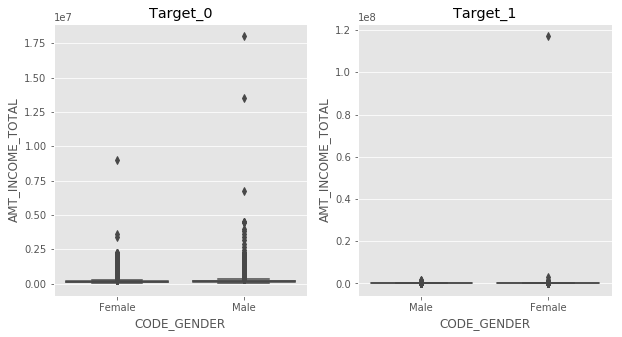

In [170]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title("Target_0")
sns.boxplot(x="CODE_GENDER",y='AMT_INCOME_TOTAL',data=target_0)
plt.subplot(1,2,2)
plt.title("Target_1")
sns.boxplot(x="CODE_GENDER",y='AMT_INCOME_TOTAL',data=target_1)
plt.show()

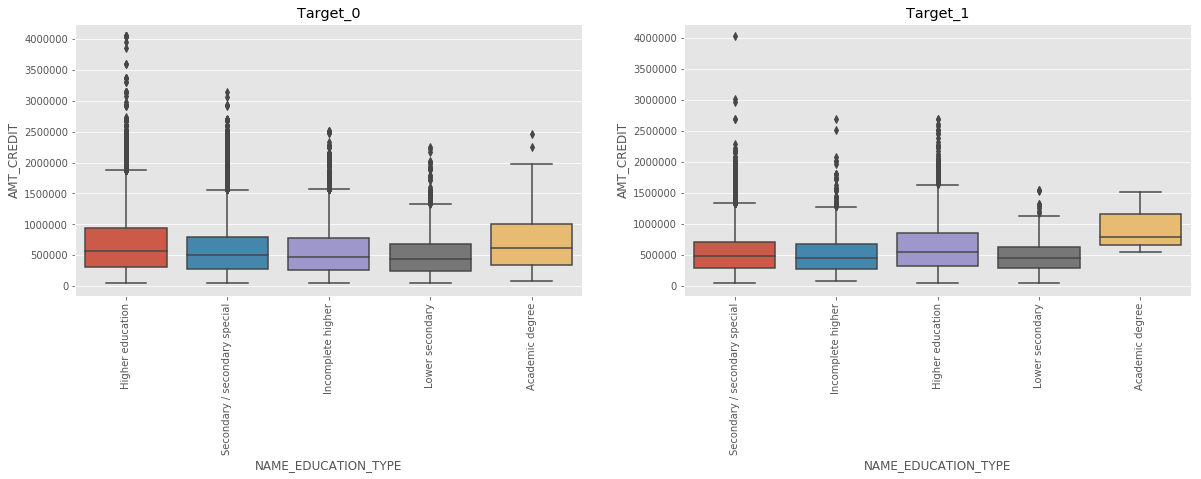

In [171]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Target_0")
plt.xticks(rotation=90)
sns.boxplot(x="NAME_EDUCATION_TYPE",y='AMT_CREDIT',data=target_0)
plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title("Target_1")
sns.boxplot(x="NAME_EDUCATION_TYPE",y='AMT_CREDIT',data=target_1)
plt.show()


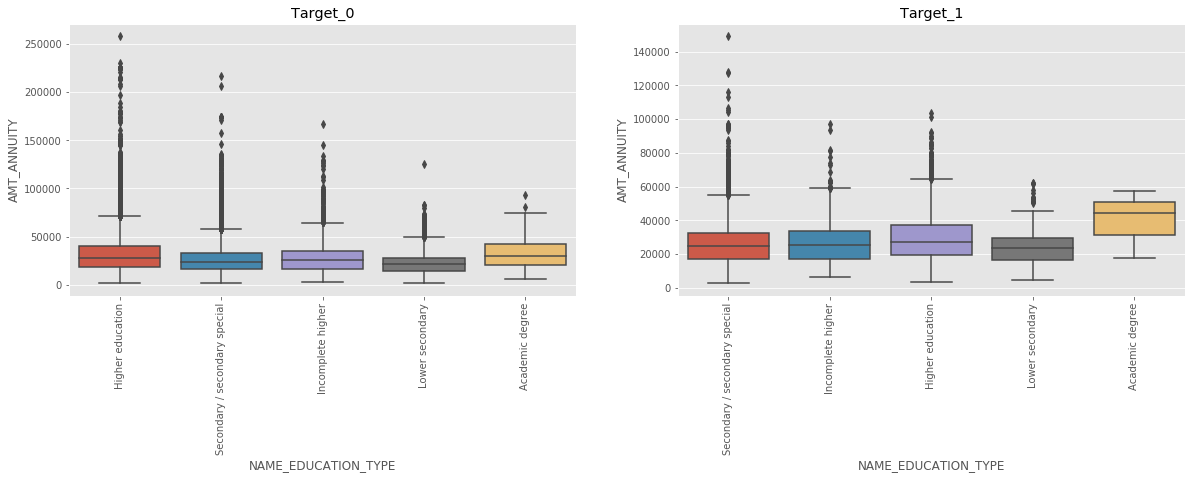

In [172]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Target_0")
plt.xticks(rotation=90)
sns.boxplot(x="NAME_EDUCATION_TYPE",y='AMT_ANNUITY',data=target_0)
plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title("Target_1")
sns.boxplot(x="NAME_EDUCATION_TYPE",y='AMT_ANNUITY',data=target_1)
plt.show()

#### Merging Previous data with application data by using inner join on SK_ID_CURR - reason for using Inner join is new applicants approval is largely based on the clients previous data so it will be better to have common data

In [173]:
comb_data=pd.merge(newapp,prev_app,how='inner',on='SK_ID_CURR')

In [174]:
comb_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [175]:
100*(comb_data.isnull().sum()/len(comb_data)).sort_values(ascending = False)

RATE_INTEREST_PRIMARY           99.661089
RATE_INTEREST_PRIVILEGED        99.661089
AMT_DOWN_PAYMENT                53.019143
RATE_DOWN_PAYMENT               53.019143
FLOORSMAX_MODE                  49.411592
FLOORSMAX_MEDI                  49.411592
FLOORSMAX_AVG                   49.411592
NAME_TYPE_SUITE_y               49.139176
YEARS_BEGINEXPLUATATION_MEDI    48.433554
YEARS_BEGINEXPLUATATION_AVG     48.433554
YEARS_BEGINEXPLUATATION_MODE    48.433554
TOTALAREA_MODE                  47.928406
EMERGENCYSTATE_MODE             47.066097
DAYS_TERMINATION                39.689781
NFLAG_INSURED_ON_APPROVAL       39.689781
DAYS_LAST_DUE                   39.689781
DAYS_LAST_DUE_1ST_VERSION       39.689781
DAYS_FIRST_DUE                  39.689781
DAYS_FIRST_DRAWING              39.689781
OCCUPATION_TYPE                 32.366943
AMT_GOODS_PRICE_y               22.602264
AMT_ANNUITY_y                   21.731607
CNT_PAYMENT                     21.731254
ORGANIZATION_TYPE               19

In [176]:
null_percentage = 100*(comb_data.isnull().sum()/len(comb_data))
req_cols_1 = null_percentage[null_percentage<50]
req_cols_1 = req_cols_1.index
req_cols_1

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=116)

In [177]:
comb_data = comb_data[req_cols_1]
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413646 entries, 0 to 1413645
Columns: 116 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(1), float64(42), int32(1), int64(43), object(29)
memory usage: 1.2+ GB


### Univariate analysis on combined data on categorical varibales

In [178]:
cat_cols_comb = ['NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','OCCUPATION_TYPE','CODE_GENDER','NAME_EDUCATION_TYPE']

In [179]:
list(enumerate(cat_cols_comb))

[(0, 'NAME_CONTRACT_STATUS'),
 (1, 'NAME_CLIENT_TYPE'),
 (2, 'OCCUPATION_TYPE'),
 (3, 'CODE_GENDER'),
 (4, 'NAME_EDUCATION_TYPE')]

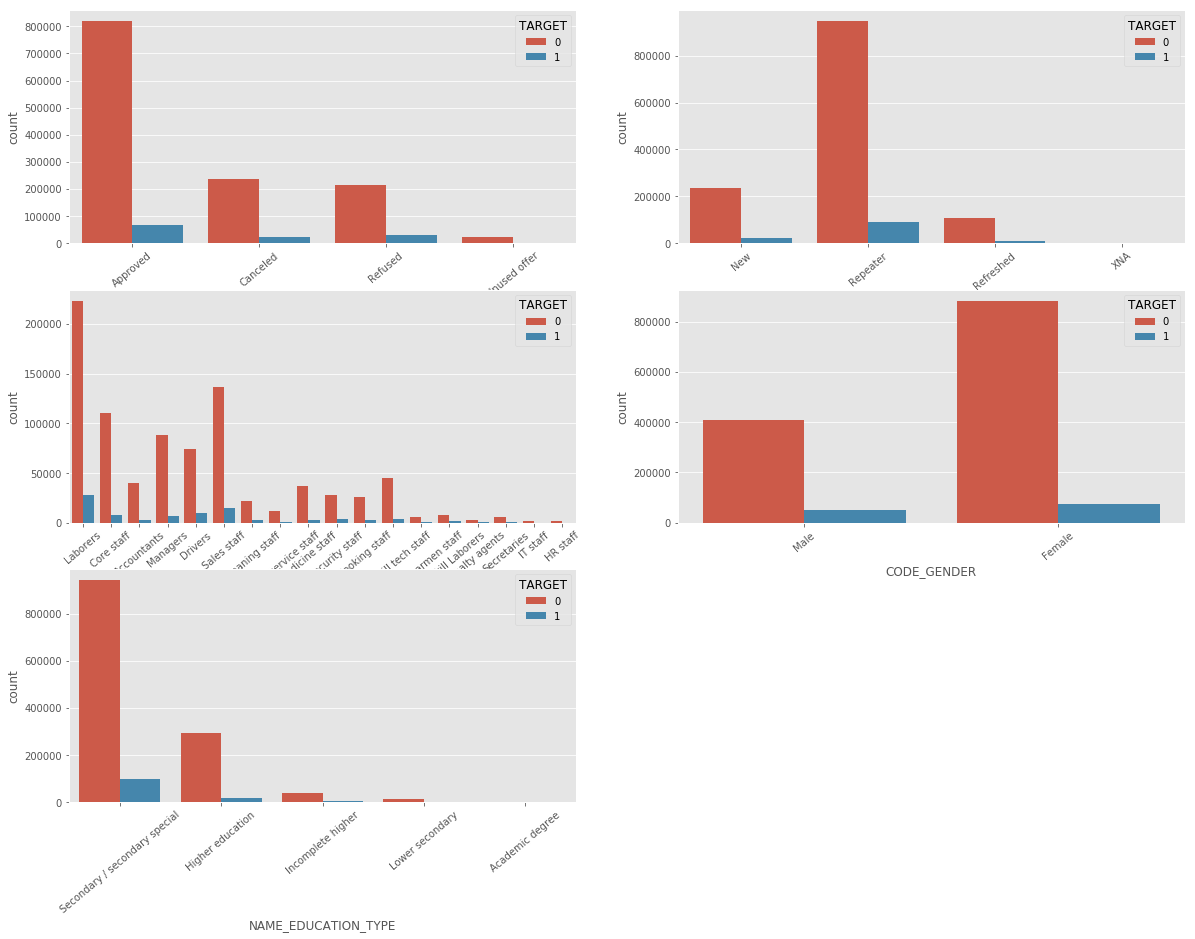

In [180]:
plt.figure(figsize = (20, 30))

for i in enumerate(cat_cols_comb):
    plt.subplot(6, 2, i[0]+1)
    plt.xticks(rotation=40)
    sns.countplot(x = i[1], hue = 'TARGET', data = comb_data)

In [181]:
num_cols_comb = ['AMT_INCOME_TOTAL','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_ANNUITY_x','AMT_ANNUITY_y','AMT_CREDIT_x','AMT_CREDIT_y', 'CNT_CHILDREN']

In [182]:
list(enumerate(num_cols_comb))

[(0, 'AMT_INCOME_TOTAL'),
 (1, 'AMT_REQ_CREDIT_BUREAU_YEAR'),
 (2, 'AMT_REQ_CREDIT_BUREAU_QRT'),
 (3, 'AMT_ANNUITY_x'),
 (4, 'AMT_ANNUITY_y'),
 (5, 'AMT_CREDIT_x'),
 (6, 'AMT_CREDIT_y'),
 (7, 'CNT_CHILDREN')]

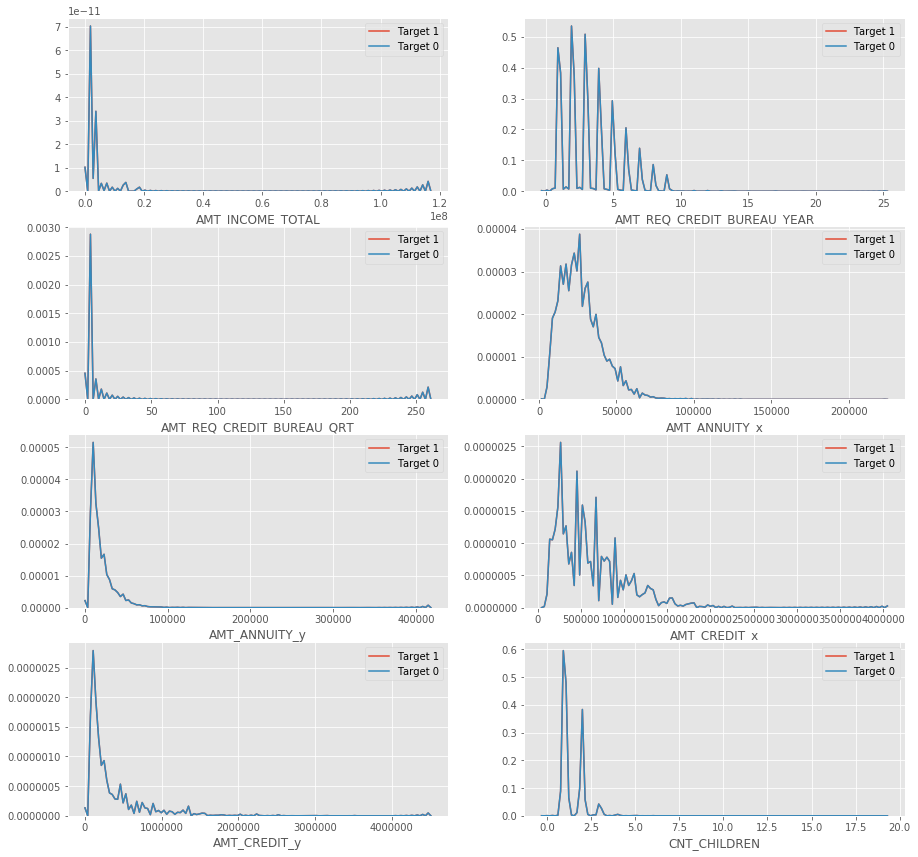

In [183]:
num_cols_comb_uni = num_cols_comb[:7]
plt.figure(figsize = (15, 30))
for i in enumerate(num_cols_comb):
    plt.subplot(8, 2, i[0]+1)
    sns.distplot(comb_data[i[1]].dropna(), hist = False, label = "Target 1", kde_kws={'bw':0.1})
    sns.distplot(comb_data[i[1]].dropna(), hist = False, label = "Target 0", kde_kws={'bw':0.1})

### Bivariate Analysis on Numerical columns

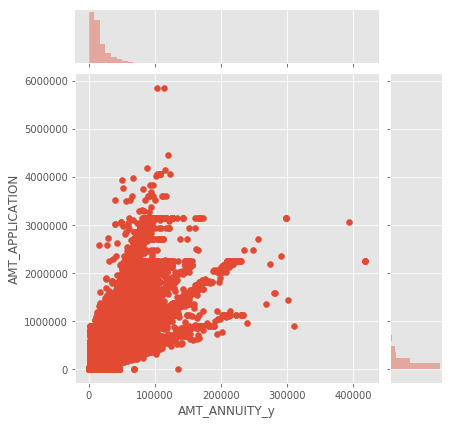

In [184]:
sns.jointplot(comb_data['AMT_ANNUITY_y'],comb_data['AMT_APPLICATION'])
plt.show()

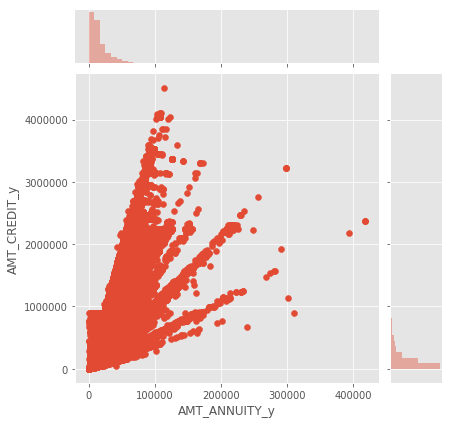

In [185]:
sns.jointplot(comb_data['AMT_ANNUITY_y'],comb_data['AMT_CREDIT_y'])
plt.show()

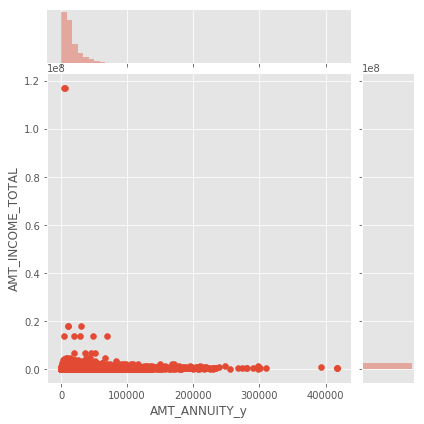

In [186]:
sns.jointplot(comb_data['AMT_ANNUITY_y'],comb_data['AMT_INCOME_TOTAL'])
plt.show()

### Bivariate Analysis on Categorical columns

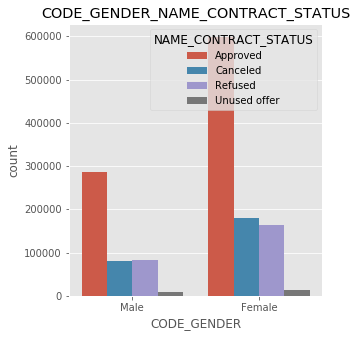

In [187]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', hue = 'NAME_CONTRACT_STATUS', data = comb_data)
plt.title("CODE_GENDER_NAME_CONTRACT_STATUS")
plt.show()

In [188]:
cat_cols_comb = ['NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','Income_Category','Credit_Amount_Cat','OCCUPATION_TYPE','CODE_GENDER','NAME_EDUCATION_TYPE']

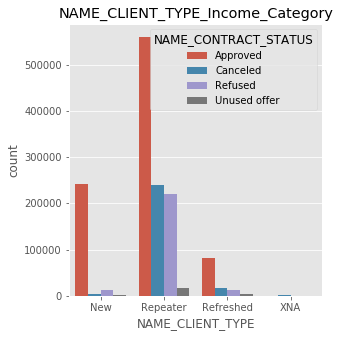

In [189]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CLIENT_TYPE', hue = 'NAME_CONTRACT_STATUS', data = comb_data)
plt.title("NAME_CLIENT_TYPE_Income_Category")
plt.show()

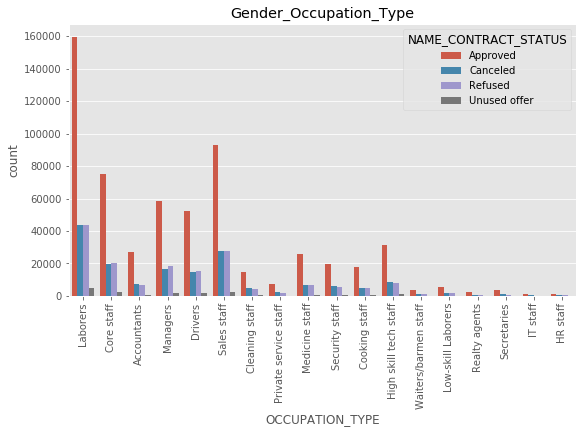

In [190]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x = 'OCCUPATION_TYPE', hue = 'NAME_CONTRACT_STATUS', data = comb_data)
plt.xticks(rotation=90)
plt.title("Gender_Occupation_Type")
plt.show()